<a href="https://colab.research.google.com/github/Mohd-Farhan/LGMVIP-DataScience/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mohd. Farhan Siddiqui**


**Data Science Intern at LGMVIP**

**Task 2 Stock Market Prediction And Forecasting Using LSTM**

**Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

**Loading Data**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/Copy of NSE-TATAGLOBAL.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


**Preprocessing the Data**

In [ ]:
df=df.loc[::-1]
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [ ]:
df1=df.reset_index()['Close']
df1

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

**Exploratary Data Analysis**

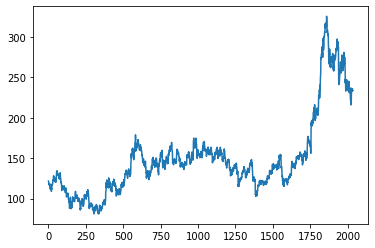

In [ ]:
plt.plot(df1)

**Model Building**

In [ ]:
scaler =MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1


array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [ ]:
trainSize=int(len(df1)*0.70)
testSize=len(df1)-trainSize
trainData=df1[0:trainSize,:]
testData=df1[trainSize:len(df1),:1]

In [ ]:
def dataset(data,timeStep=1):
  dataX,dataY=[],[]
  for i in range(len(data)-timeStep-1):
    a=data[i:(i+timeStep),0]
    dataX.append(a)
    dataY.append(data[i+timeStep,0])
  return np.array(dataX),np.array(dataY)

In [ ]:
x_train,y_train=dataset(trainData,200)
x_test,y_test=dataset(testData,200)

In [ ]:
x_train

array([[0.16584967, 0.16319444, 0.1621732 , ..., 0.0692402 , 0.0629085 ,
        0.06781046],
       [0.16319444, 0.1621732 , 0.14971405, ..., 0.0629085 , 0.06781046,
        0.0684232 ],
       [0.1621732 , 0.14971405, 0.15400327, ..., 0.06781046, 0.0684232 ,
        0.07700163],
       ...,
       [0.20996732, 0.21098856, 0.21568627, ..., 0.16441993, 0.15236928,
        0.15482026],
       [0.21098856, 0.21568627, 0.22079248, ..., 0.15236928, 0.15482026,
        0.15420752],
       [0.21568627, 0.22079248, 0.21609477, ..., 0.15482026, 0.15420752,
        0.15012255]])

In [ ]:
print(x_train.shape)
print(y_train.shape)

(1223, 200)
(1223,)


In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(200,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 200, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


**Model Training**

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 17s 498ms/step - loss: 0.0108 - val_loss: 0.0340
Epoch 2/100
20/20 [==============================] - 8s 400ms/step - loss: 0.0018 - val_loss: 0.0063
Epoch 3/100
20/20 [==============================] - 8s 408ms/step - loss: 9.8988e-04 - val_loss: 0.0050
Epoch 4/100
20/20 [==============================] - 8s 412ms/step - loss: 9.1323e-04 - val_loss: 0.0081
Epoch 5/100
20/20 [==============================] - 8s 416ms/step - loss: 8.4712e-04 - val_loss: 0.0054
Epoch 6/100
20/20 [==============================] - 8s 417ms/step - loss: 8.1066e-04 - val_loss: 0.0051
Epoch 7/100
20/20 [==============================] - 8s 408ms/step - loss: 7.8883e-04 - val_loss: 0.0070
Epoch 8/100
20/20 [==============================] - 8s 414ms/step - loss: 8.0263e-04 - val_loss: 0.0083
Epoch 9/100
20/20 [==============================] - 8s 407ms/step - loss: 7.4993e-04 - val_loss: 0.0057
Epoch 10/100
20/20 [==============================] - 8s 418ms

**Model Testing**

In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
math.sqrt(mean_squared_error(y_train,train_predict))

137.0852664479403

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

223.23935496102257

In [ ]:
look_back=200
trainPridictPlot=np.empty_like(df1)
trainPridictPlot[:,:]=np.nan
trainPridictPlot[look_back:len(train_predict)+look_back,:]=train_predict
testPridictPlot=np.empty_like(df1)
testPridictPlot[:,:]=np.nan
testPridictPlot[len(train_predict)+(look_back*2)+2:len(df1),:]=test_predict

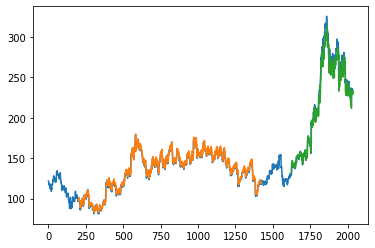

In [ ]:
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPridictPlot)
plt.plot(testPridictPlot)
plt.show()

**Prediction**

In [ ]:
x_input=testData[411:].reshape(1,-1)
x_input.shape

(1, 200)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8476307189542482,
 0.8880718954248368,
 0.8449754901960784,
 0.8312908496732025,
 0.8306781045751634,
 0.8410947712418302,
 0.8574346405228759,
 0.8974673202614378,
 0.8982843137254903,
 0.8954248366013071,
 0.906045751633987,
 0.9191176470588236,
 0.917483660130719,
 0.9217728758169936,
 0.9618055555555556,
 0.9475081699346404,
 0.940359477124183,
 0.940563725490196,
 0.9448529411764706,
 0.9477124183006536,
 0.9667075163398695,
 0.957312091503268,
 0.9524101307189543,
 0.9491421568627452,
 1.0,
 0.988766339869281,
 0.9618055555555556,
 0.9501633986928106,
 0.9170751633986929,
 0.928921568627451,
 0.9309640522875817,
 0.9242238562091503,
 0.9121732026143792,
 0.9121732026143792,
 0.9021650326797386,
 0.9111519607843137,
 0.8566176470588234,
 0.8472222222222223,
 0.7920751633986929,
 0.7849264705882355,
 0.7587826797385622,
 0.8137254901960784,
 0.8149509803921569,
 0.8059640522875817,
 0.8339460784313726,
 0.821078431372549,
 0.8092320261437909,
 0.7951388888888891,
 0.763888888888

In [ ]:
lst_output=[]
n_steps=200
i=0
while(i<30):
  if(len(temp_input)>200):
    x_input=np.array(temp_input[1:])
    print(i,"day input",x_input)
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    y_output=model.predict(x_input,verbose=0)
    print(i,"day output",y_output)
    temp_input.extend(y_output[0].tolist())
    temp_input=temp_input[1:]
    lst_output.extend(y_output.tolist())
    i=i+1
  else:
    x_input=x_input.reshape((1,n_steps,1))
    y_output=model.predict(x_input,verbose=0)
    print(y_output[0])
    temp_input.extend(y_output[0].tolist())
    print(len(temp_input))
    lst_output.extend(y_output.tolist())
    i=i+1


print(lst_output)

[0.60930645]
201
1 day input [0.8880719  0.84497549 0.83129085 0.8306781  0.84109477 0.85743464
 0.89746732 0.89828431 0.89542484 0.90604575 0.91911765 0.91748366
 0.92177288 0.96180556 0.94750817 0.94035948 0.94056373 0.94485294
 0.94771242 0.96670752 0.95731209 0.95241013 0.94914216 1.
 0.98876634 0.96180556 0.9501634  0.91707516 0.92892157 0.93096405
 0.92422386 0.9121732  0.9121732  0.90216503 0.91115196 0.85661765
 0.84722222 0.79207516 0.78492647 0.75878268 0.81372549 0.81495098
 0.80596405 0.83394608 0.82107843 0.80923203 0.79513889 0.76388889
 0.74305556 0.75837418 0.74019608 0.77512255 0.78656046 0.79268791
 0.79473039 0.79207516 0.79534314 0.78921569 0.76776961 0.78615196
 0.76552288 0.79697712 0.8057598  0.80698529 0.81147876 0.78206699
 0.73386438 0.73978758 0.74448529 0.72671569 0.72283497 0.74040033
 0.74693627 0.72630719 0.80065359 0.79187092 0.77328431 0.78451797
 0.78329248 0.80412582 0.79473039 0.7879902  0.7879902  0.79473039
 0.81168301 0.81699346 0.82986111 0.83843

In [ ]:
dayNew=np.arange(1,201)
dayPred=np.arange(201,231)

In [ ]:
df3=df1.tolist();
df3.extend(lst_output)

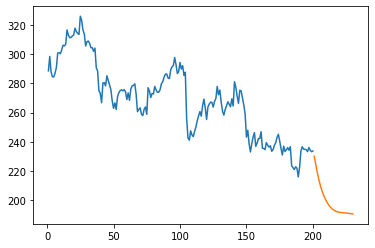

In [ ]:
plt.plot(dayNew,scaler.inverse_transform(df1[1835:]))
plt.plot(dayPred,scaler.inverse_transform(lst_output))

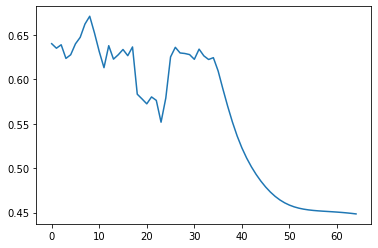

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])